# Return to Fandango
A look into the movie rating site to determine if there is still a ratings bias as uncovered by Walter Hickey in 2015.  That is, if the site preferencially rounds the ratings up so that the reader sees an inflated movie score, making them more likely to purchase a ticket.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import datasets
prereview_data = pd.read_csv('fandango_score_comparison.csv')
postreview_data = pd.read_csv('movie_ratings_16_17.csv')

In [39]:
print(prereview_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [40]:
postreview_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [41]:
predata = prereview_data[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
posdata = postreview_data[['movie','year','fandango']].copy()

Look at the difference in fandago rating between movies released in 2016, 2017 and 2018

In [42]:
#need to isolate movies from 2015
predata['Year'] = predata['FILM'].str[-5:-1]
m2015 = predata.loc[predata['Year']=='2015',:]
m2016 = posdata.loc[posdata['year']==2016,:]
m2017 = posdata.loc[posdata['year']==2017,:]

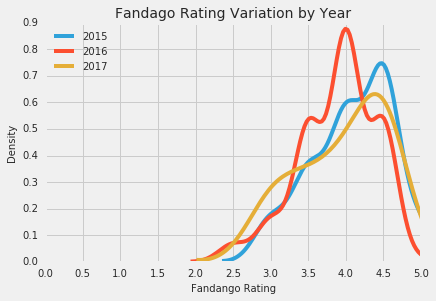

In [53]:
plt.style.use('fivethirtyeight')
sns.kdeplot(m2015['Fandango_Stars'],label='2015')
sns.kdeplot(m2016['fandango'],label='2016')
sns.kdeplot(m2017['fandango'],label='2017')
ax = plt.gca()
ax.set_xticks(np.arange(0,5.5,.5))
ax.set_xlim(0,5.0)
plt.xlabel('Fandango Rating',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Fandago Rating Variation by Year',fontsize=14)
plt.show()

The distribution from 2015 is significantly left skewed, while that of 2016 appears more normal.  2017 regains the shape of 2015.
This suggests that perhaps the publishing of the article impacted the ratings in the near term (2016), but that by 2017 the skew had reemerged.
Interestingly, no ratings appear below 2.0 stars, so ratings in general appear to skew to the right, however given that we are only looking at ratings of popular movies, perhaps this is a result of the sampling method.

In [69]:
freqTable = pd.concat((m2015['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=True).to_frame(name='2015'),
           m2016['fandango'].value_counts(normalize=True).sort_index(ascending=True).to_frame(name='2016'),
           m2017['fandango'].value_counts(normalize=True).sort_index(ascending=True).to_frame(name='2017')),axis=1)

freqTable

,2015,2016,2017
2.5,NaN,0.031414,NaN
3.0,0.085271,0.073298,0.173913
3.5,0.178295,0.240838,0.173913
4.0,0.286822,0.403141,0.217391
4.5,0.379845,0.246073,0.434783
5.0,0.069767,0.005236,NaN


The numbers in the table bear out the trends evident in the kde plots.  2016 had a higher 3.5 and 4 star rating, whereas 2015 and 2017 had a higher 4.5 star rating.  Interestingly, it looks like they capped the rating at 4.5 stars for 2017.

In [126]:
st2015 = [m2015['Fandango_Stars'].mean(),m2015['Fandango_Stars'].median(),m2015['Fandango_Stars'].mode()[0]]
st2016 = [m2016['fandango'].mean(),m2016['fandango'].median(),m2016['fandango'].mode()[0]]
st2017 = [m2017['fandango'].mean(),m2017['fandango'].median(),m2017['fandango'].mode()[0]]

dataS = pd.DataFrame(st2015,columns=['2015'])
dataS['2016'] = st2016
dataS['2017'] = st2017
dataS.set_index(pd.Series(['Mean','Median','Mode']),inplace=True)
dataS

,2015,2016,2017
Mean,4.085271,3.887435,3.956522
Median,4.000000,4.000000,4.000000
Mode,4.500000,4.000000,4.500000


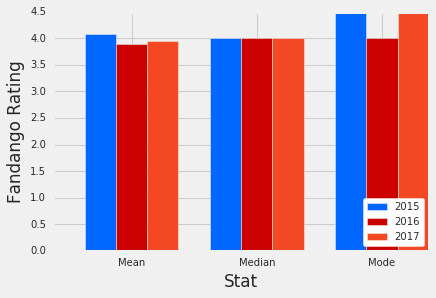

In [158]:
plt.style.use('fivethirtyeight')
plt.bar([.5,2.5,4.5],dataS['2015'],label='2015',width=0.5,color = '#0066FF')
plt.bar([1,3,5],dataS['2016'],label='2016',width=0.5,color = '#CC0000')
plt.bar([1.5,3.5,5.5],dataS['2017'],label='2017',width=0.5,color = '#F44924')
ax = plt.gca()
ax.set_xticks([1.25,3.25,5.25])
ax.set_xticklabels(['Mean','Median','Mode'])
t=plt.legend(frameon=True,loc=4)
l = t.get_frame()
l.set_facecolor('white')
plt.ylabel('Fandango Rating')
plt.xlabel('Stat')
plt.show()

# Conclusion
As we have seen earlier, the stats (in particular the mode which is reduce by 0.5) seem to bare out the analysis that Fandango adjusted their rating system in 2016, likely in response to Hickey's article.  However that adjustment appears to have proven short lived, as they are back at it in 2017.